# Correlations between outflow properties and galaxy properties

After performing the kinematic analysis of the sample of 19 type-II QSOs with intermediate redshifts 0.3<z<0.4, the results from the non-parametric analysis of the [OIII]5007 emission lines are compared with different properties of the host galaxy:
- The presence of YSP<100 Myr within the host galaxy.
- The merger evidence and galaxy interaction stage.
- The galaxy radio emission.
- The environment of the host galaxy.

Also, the results from each method of outflow detection and energetic analysis are correlated with the properties of the host galaxy.

In [1]:
import numpy as np
from astropy.io import ascii
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

import seaborn as sns
palette = sns.color_palette('tab10',8)
blue,orange,green,red = palette[0],palette[1],palette[2],palette[3]
sns.set_palette('tab10',8)
sns.set_style('whitegrid')

from matplotlib.colors import LinearSegmentedColormap
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
                 (0.000, blue),
                 (0.500, (1.000, 1.000, 1.000)),
                 (1.000, red)))

## Correlations between outflow kinematic properties and galaxy properties

We have decided to study both the Pearson correlation between the data, that evaluates the linear relationship between two continuous variables, and the Spearman correlation, which evaluates the monotonic relationship between two variables.

In [2]:
# Import the targets info
targets_info = ascii.read('../spectra/targets_info_complete.csv').to_pandas().replace(to_replace=['no', 'yes'], value=[0, 1])
targets_info.insert(13,"LumO3",10**targets_info['logLumO3'])
targets_info.insert(14,"L5GHz",10**targets_info['logL5GHz'])

# Import the data from the parametric and the non-parametric analysis
param_data = ascii.read('../kinematic_analysis/Tables/parametric.txt').to_pandas()
nonparam_data = ascii.read('../kinematic_analysis/Tables/nonparametric.txt').to_pandas()

In [3]:
df_nonpar = pd.concat([nonparam_data[['Width80','DeltaV','V05','V95','Vmed','Asymmetry']],\
                       targets_info[['YSP100','merger','groups','LumO3','L5GHz','b_gp']]],axis=1)
df_nonpar.columns=[r'$W_{80}$', r' $\Delta$V', r'$v_{05}$',r'$v_{95}$',r'$v_{med}$','a', 'YSP100','merger', 'groups',r'L$_{[OIII]}$/L$_{\odot}$',r'L$_{5GHz}$',r'B$_{gq}$']

In [4]:
# Statistics of the data
nonpar_mean = df_nonpar[[r'$W_{80}$', r' $\Delta$V', r'$v_{05}$',r'$v_{95}$',r'$v_{med}$','a']].mean()
nonpar_std = df_nonpar[[r'$W_{80}$', r' $\Delta$V', r'$v_{05}$',r'$v_{95}$',r'$v_{med}$','a']].std()
nonpar_min = df_nonpar[[r'$W_{80}$', r' $\Delta$V', r'$v_{05}$',r'$v_{95}$',r'$v_{med}$','a']].min()
nonpar_max = df_nonpar[[r'$W_{80}$', r' $\Delta$V', r'$v_{05}$',r'$v_{95}$',r'$v_{med}$','a']].max()

In [5]:
# Correlations
spear_nonpar=df_nonpar.corr(method="spearman")
pear_nonpar=df_nonpar.corr(method="pearson")

mask_nonpar = np.zeros_like(spear_nonpar,dtype=bool)
mask_nonpar[np.triu_indices_from(mask_nonpar)] = True

spear_nonpar[mask_nonpar] = np.nan
pear_nonpar[mask_nonpar] = np.nan

#### Spearman correlation matrix

In [6]:
spear_nonpar.style.background_gradient(cmap=my_gradient, vmin=-1, vmax=1)\
.highlight_null(null_color='#f1f1f1').set_precision(4)

/var/folders/3j/6xqthwqj47x1ltdbfhmylwl00000gs/T/ipykernel_4549/2898255200.py:1: FutureWarning: `null_color` is deprecated: use `color` instead
  spear_nonpar.style.background_gradient(cmap=my_gradient, vmin=-1, vmax=1)\
/var/folders/3j/6xqthwqj47x1ltdbfhmylwl00000gs/T/ipykernel_4549/2898255200.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .highlight_null(null_color='#f1f1f1').set_precision(4)


,$W_{80}$,$\Delta$V,$v_{05}$,$v_{95}$,$v_{med}$,a,YSP100,merger,groups,L$_{[OIII]}$/L$_{\odot}$,L$_{5GHz}$,B$_{gq}$
$W_{80}$,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
$\Delta$V,-0.4702,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
$v_{05}$,-0.9088,0.7474,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
$v_{95}$,0.8175,0.0088,-0.6333,nan,nan,nan,nan,nan,nan,nan,nan,nan
$v_{med}$,-0.3632,0.5965,0.3789,0.1000,nan,nan,nan,nan,nan,nan,nan,nan
a,-0.5246,0.9737,0.7667,-0.0509,0.5509,nan,nan,nan,nan,nan,nan,nan
YSP100,-0.0873,0.3710,0.2182,0.1091,0.1091,0.3491,nan,nan,nan,nan,nan,nan
merger,-0.3300,0.0236,0.2593,-0.2357,0.1414,0.0471,0.2777,nan,nan,nan,nan,nan
groups,0.3052,-0.1825,-0.2867,0.1466,-0.1936,-0.1890,-0.4472,-0.7432,nan,nan,nan,nan
L$_{[OIII]}$/L$_{\odot}$,-0.3194,0.1799,0.2764,-0.1553,0.1185,0.1939,0.4257,0.2004,-0.2905,nan,nan,nan


The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

We have decided to study more on detail the results from the Spearman correlations by studying their p-values. The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable for datasets smaller than 500 or so.

#### Spearman coefficients and pvalues

In [7]:
sp_asym_lumO3,pvalue_asym_lumO3 = stats.spearmanr(df_nonpar['a'],df_nonpar[r'L$_{[OIII]}$/L$_{\odot}$'], nan_policy='omit')
sp_asym_L5GHz,pvalue_asym_L5GHz = stats.spearmanr(df_nonpar['a'],df_nonpar[r'L$_{5GHz}$'], nan_policy='omit')
sp_asym_bgp,pvalue_asym_bgp = stats.spearmanr(df_nonpar['a'],df_nonpar[r'B$_{gq}$'], nan_policy='omit')
sp_w80_lumO3,pvalue_w80_lumO3 = stats.spearmanr(df_nonpar[r'$W_{80}$'],df_nonpar[r'L$_{[OIII]}$/L$_{\odot}$'], nan_policy='propagate')
sp_w80_L5GHz,pvalue_w80_L5GHz = stats.spearmanr(df_nonpar[r'$W_{80}$'],df_nonpar[r'L$_{5GHz}$'], nan_policy='propagate')
sp_w80_bgp,pvalue_w80_bgp = stats.spearmanr(df_nonpar[r'$W_{80}$'],df_nonpar[r'B$_{gq}$'], nan_policy='propagate')

pvalues_kinematics = pd.DataFrame(data={'Variables':[r'a-L$_{[OIII]}$',r'a-L$_{5GHz}$',r'a-B$_{gq}$',r'$W_{80}$-L$_{[OIII]}$',r'$W_{80}$-L$_{5GHz}$',r'$W_{80}$-B$_{gq}$'],\
                                        r'$R_s$':[sp_asym_lumO3,sp_asym_L5GHz,sp_asym_bgp,sp_w80_lumO3,sp_w80_L5GHz,sp_w80_bgp],\
                                        r'$P_{value}$':[pvalue_asym_lumO3,pvalue_asym_L5GHz,pvalue_asym_bgp,pvalue_w80_lumO3,pvalue_w80_L5GHz,pvalue_w80_bgp]})

In [8]:
pvalues_kinematics

,Variables,$R_s$,$P_{value}$
0,a-L$_{[OIII]}$,0.193945,0.426270
1,a-L$_{5GHz}$,-0.428823,0.066955
2,a-B$_{gq}$,0.207986,0.392859
3,$W_{80}$-L$_{[OIII]}$,-0.319438,0.182493
4,$W_{80}$-L$_{5GHz}$,0.061512,0.802466
5,$W_{80}$-B$_{gq}$,-0.243089,0.315951


## Correlations between outflow energetic properties and galaxy properties

In [9]:
# Import the data from the parametric and the non-parametric analysis
speranza = ascii.read('../kinematic_analysis/Tables/outflow_energy_giovanna.txt').to_pandas()
nonparametric = ascii.read('../kinematic_analysis/Tables/outflow_energy_nonpar.txt').to_pandas()
par = ascii.read('../kinematic_analysis/Tables/outflow_energy_par.txt').to_pandas()

speranza.insert(1,"Mof",10**speranza['LogMof'])
speranza.insert(2,"eMof",10**speranza['LogMof']*np.log(10)*speranza['eLogMof'])
speranza.insert(3,"Ekin",10**speranza['LogEkin'])
speranza.insert(4,"eEkin",10**speranza['LogEkin']*np.log(10)*speranza['eLogEkin'])
speranza.insert(5,"E.kin",10**speranza['LogE.kin'])
speranza.insert(6,"eE.kin",10**speranza['LogE.kin']*np.log(10)*speranza['eLogE.kin'])

nonparametric.insert(1,"Mof",10**nonparametric['LogMof'])
nonparametric.insert(2,"eMof",10**nonparametric['LogMof']*np.log(10)*nonparametric['eLogMof'])
nonparametric.insert(3,"Ekin",10**nonparametric['LogEkin'])
nonparametric.insert(4,"eEkin",10**nonparametric['LogEkin']*np.log(10)*nonparametric['eLogEkin'])
nonparametric.insert(5,"E.kin",10**nonparametric['LogE.kin'])
nonparametric.insert(6,"eE.kin",10**nonparametric['LogE.kin']*np.log(10)*nonparametric['eLogE.kin'])

par.insert(1,"Mof",10**par['LogMof'])
par.insert(2,"eMof",10**par['LogMof']*np.log(10)*par['eLogMof'])
par.insert(3,"Ekin",10**par['LogEkin'])
par.insert(4,"eEkin",10**par['LogEkin']*np.log(10)*par['eLogEkin'])
par.insert(5,"E.kin",10**par['LogE.kin'])
par.insert(6,"eE.kin",10**par['LogE.kin']*np.log(10)*par['eLogE.kin'])

#### Speranza et al. 2022 method

In [10]:
df_spe = pd.concat([speranza[['Mof','Ekin','E.kin','M.of']],\
                       targets_info[['YSP100','merger','groups','LumO3','L5GHz','b_gp']]],axis=1)
df_spe.columns=[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$','YSP100','Mergers','Stage',r'L$_{[OIII]}$/L$_{\odot}$',r'L$_{5GHz}$',r'B$_{gq}$']

In [11]:
# Statistics of the data
spe_mean = df_spe[[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$']].mean()
spe_std = df_spe[[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$']].std()
spe_min = df_spe[[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$']].min()
spe_max = df_spe[[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$']].max()

In [12]:
spear_spe = df_spe.corr(method="spearman")
mask_spe =  np.zeros_like(spear_spe,dtype=bool)
mask_spe[np.triu_indices_from(mask_spe)] = True
spear_spe[mask_spe] = np.nan

spear_spe.style.background_gradient(cmap=my_gradient, vmin=-1, vmax=1)\
.highlight_null(null_color='#f1f1f1').set_precision(4)

/var/folders/3j/6xqthwqj47x1ltdbfhmylwl00000gs/T/ipykernel_4549/3864195549.py:6: FutureWarning: `null_color` is deprecated: use `color` instead
  spear_spe.style.background_gradient(cmap=my_gradient, vmin=-1, vmax=1)\
/var/folders/3j/6xqthwqj47x1ltdbfhmylwl00000gs/T/ipykernel_4549/3864195549.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .highlight_null(null_color='#f1f1f1').set_precision(4)


,$M_{OF}$,$E_{KIN}$,$\dot{E}_{KIN}$,$\dot{M}_{OF}$,YSP100,Mergers,Stage,L$_{[OIII]}$/L$_{\odot}$,L$_{5GHz}$,B$_{gq}$
$M_{OF}$,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
$E_{KIN}$,0.8758,nan,nan,nan,nan,nan,nan,nan,nan,nan
$\dot{E}_{KIN}$,0.8098,0.9890,nan,nan,nan,nan,nan,nan,nan,nan
$\dot{M}_{OF}$,0.9640,0.9600,0.9248,nan,nan,nan,nan,nan,nan,nan
YSP100,0.1747,-0.0109,-0.0766,0.0436,nan,nan,nan,nan,nan,nan
Mergers,-0.1062,-0.0236,-0.0118,-0.1179,0.2777,nan,nan,nan,nan,nan
Stage,0.0106,0.0162,0.0652,0.0728,-0.4472,-0.7432,nan,nan,nan,nan
L$_{[OIII]}$/L$_{\odot}$,0.5015,0.2342,0.1329,0.3431,0.4257,0.2004,-0.2905,nan,nan,nan
L$_{5GHz}$,0.0536,0.2160,0.2706,0.1880,-0.5465,-0.1417,0.3537,-0.2725,nan,nan
B$_{gq}$,-0.0299,-0.0629,-0.0401,-0.0448,0.1637,0.4480,-0.1301,0.3775,0.1415,nan


#### Non parametric method

In [13]:
df_np = pd.concat([nonparametric[['Mof','Ekin','E.kin','M.of']],\
                       targets_info[['YSP100','merger','groups','LumO3','L5GHz','b_gp']]],axis=1)
df_np.columns=[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$','YSP100','Mergers','Stage',r'L$_{[OIII]}$/L$_{\odot}$',r'L$_{5GHz}$',r'B$_{gq}$']

In [14]:
# Statistics of the data
spe_mean = df_np[[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$']].mean()
spe_std = df_np[[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$']].std()
spe_min = df_np[[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$']].min()
spe_max = df_np[[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$']].max()

In [15]:
spear_np = df_np.corr(method="spearman")
mask_np =  np.zeros_like(spear_np,dtype=bool)
mask_np[np.triu_indices_from(mask_np)] = True
spear_np[mask_np] = np.nan

spear_np.style.background_gradient(cmap=my_gradient, vmin=-1, vmax=1)\
.highlight_null(null_color='#f1f1f1').set_precision(4)

/var/folders/3j/6xqthwqj47x1ltdbfhmylwl00000gs/T/ipykernel_4549/3718250790.py:6: FutureWarning: `null_color` is deprecated: use `color` instead
  spear_np.style.background_gradient(cmap=my_gradient, vmin=-1, vmax=1)\
/var/folders/3j/6xqthwqj47x1ltdbfhmylwl00000gs/T/ipykernel_4549/3718250790.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .highlight_null(null_color='#f1f1f1').set_precision(4)


,$M_{OF}$,$E_{KIN}$,$\dot{E}_{KIN}$,$\dot{M}_{OF}$,YSP100,Mergers,Stage,L$_{[OIII]}$/L$_{\odot}$,L$_{5GHz}$,B$_{gq}$
$M_{OF}$,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
$E_{KIN}$,0.5792,nan,nan,nan,nan,nan,nan,nan,nan,nan
$\dot{E}_{KIN}$,0.4323,0.9802,nan,nan,nan,nan,nan,nan,nan,nan
$\dot{M}_{OF}$,0.8140,0.9181,0.8401,nan,nan,nan,nan,nan,nan,nan
YSP100,0.2619,-0.0547,-0.1202,0.1309,nan,nan,nan,nan,nan,nan
Mergers,0.0236,-0.1537,-0.1889,-0.0471,0.2777,nan,nan,nan,nan,nan
Stage,-0.1484,0.1082,0.1930,-0.0313,-0.4472,-0.7432,nan,nan,nan,nan
L$_{[OIII]}$/L$_{\odot}$,0.6933,0.1458,0.0154,0.4405,0.4257,0.2004,-0.2905,nan,nan,nan
L$_{5GHz}$,-0.1054,0.1455,0.1954,0.0281,-0.5465,-0.1417,0.3537,-0.2725,nan,nan
B$_{gq}$,0.1176,-0.1717,-0.1903,-0.0614,0.1637,0.4480,-0.1301,0.3775,0.1415,nan


#### Parametric method

In [16]:
aux_0 = targets_info.drop(targets_info[(targets_info['ShortName']=='J0218-00')].index)
aux = aux_0.drop(aux_0[(aux_0['ShortName']=='J0334+00')].index)
aux.reset_index(drop=True, inplace=True)

df_par = pd.concat([par[['Mof','Ekin','E.kin','M.of']],\
                       aux[['YSP100','merger','groups','LumO3','L5GHz','b_gp']]],axis=1)
df_par.columns=[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$','YSP100','Mergers','Stage',r'L$_{[OIII]}$/L$_{\odot}$',r'L$_{5GHz}$',r'B$_{gq}$']

In [17]:
# Statistics of the data
spe_mean = df_par[[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$']].mean()
spe_std = df_par[[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$']].std()
spe_min = df_par[[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$']].min()
spe_max = df_par[[r'$M_{OF}$', r' $E_{KIN}$', r'$\dot{E}_{KIN}$',r'$\dot{M}_{OF}$']].max()

In [18]:
spear_par = df_par.corr(method="spearman")
mask_par =  np.zeros_like(spear_par,dtype=bool)
mask_par[np.triu_indices_from(mask_par)] = True
spear_par[mask_par] = np.nan

spear_par.style.background_gradient(cmap=my_gradient, vmin=-1, vmax=1)\
.highlight_null(null_color='#f1f1f1').set_precision(4)

/var/folders/3j/6xqthwqj47x1ltdbfhmylwl00000gs/T/ipykernel_4549/3841426025.py:6: FutureWarning: `null_color` is deprecated: use `color` instead
  spear_par.style.background_gradient(cmap=my_gradient, vmin=-1, vmax=1)\
/var/folders/3j/6xqthwqj47x1ltdbfhmylwl00000gs/T/ipykernel_4549/3841426025.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .highlight_null(null_color='#f1f1f1').set_precision(4)


,$M_{OF}$,$E_{KIN}$,$\dot{E}_{KIN}$,$\dot{M}_{OF}$,YSP100,Mergers,Stage,L$_{[OIII]}$/L$_{\odot}$,L$_{5GHz}$,B$_{gq}$
$M_{OF}$,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
$E_{KIN}$,0.2374,nan,nan,nan,nan,nan,nan,nan,nan,nan
$\dot{E}_{KIN}$,0.1227,0.9828,nan,nan,nan,nan,nan,nan,nan,nan
$\dot{M}_{OF}$,0.5637,0.8819,0.8258,nan,nan,nan,nan,nan,nan,nan
YSP100,0.1318,-0.1851,-0.1979,-0.0791,nan,nan,nan,nan,nan,nan
Mergers,-0.0283,-0.0568,-0.0850,-0.1981,0.2506,nan,nan,nan,nan,nan
Stage,-0.2279,0.0207,0.0722,0.0760,-0.4154,-0.7734,nan,nan,nan,nan
L$_{[OIII]}$/L$_{\odot}$,0.2587,-0.2658,-0.2701,-0.0773,0.4351,0.1841,-0.2571,nan,nan,nan
L$_{5GHz}$,-0.0663,0.4316,0.4034,0.3808,-0.5283,-0.0568,0.2440,-0.2200,nan,nan
B$_{gq}$,-0.1839,-0.4492,-0.4604,-0.4255,0.1978,0.4815,-0.2268,0.3877,0.1512,nan


The properties of the ionised outflows, mass outflow rate, momentum rate, and kinetic power, are correlated with the AGN luminosity. The increase in outflow rate with increasing AGN luminosity is consistent with the idea that a luminous AGN pushes away the surrounding gas through fast outflows that are driven by radiation pressure, which depends on the emitted luminosity. (Carniani et al. 2015)

#### Spearman coefficients and pvalues

In [19]:
sp_Mof_lumO3,pvalue_Mof_lumO3 = stats.spearmanr(df_spe[r'$M_{OF}$'],df_spe[r'L$_{[OIII]}$/L$_{\odot}$'], nan_policy='omit')
sp_outflowmassrate_lumO3,pvalue_outflowmassrate_lumO3 = stats.spearmanr(df_spe[r'$\dot{M}_{OF}$'],df_spe[r'L$_{[OIII]}$/L$_{\odot}$'], nan_policy='omit')

pvalues_spe = pd.DataFrame(data={'Correlation':[r'$M_{OF}$-$L_{[OIII]}$','$\dot{M}_{OF}$-$L_{[OIII]}$'],\
                                        r'$R_s$':[sp_Mof_lumO3,sp_outflowmassrate_lumO3],\
                                        r'$P_{value}$':[pvalue_Mof_lumO3,pvalue_outflowmassrate_lumO3]})

In [20]:
pvalues_spe

,Correlation,$R_s$,$P_{value}$
0,$M_{OF}$-$L_{[OIII]}$,0.501537,0.028686
1,$\dot{M}_{OF}$-$L_{[OIII]}$,0.343133,0.150366


In [21]:
sp_Mof_lumO3,pvalue_Mof_lumO3 = stats.spearmanr(df_np[r'$M_{OF}$'],df_np[r'L$_{[OIII]}$/L$_{\odot}$'], nan_policy='omit')
sp_outflowmassrate_lumO3,pvalue_outflowmassrate_lumO3 = stats.spearmanr(df_np[r'$\dot{M}_{OF}$'],df_np[r'L$_{[OIII]}$/L$_{\odot}$'], nan_policy='omit')

pvalues_np = pd.DataFrame(data={'Correlation':[r'$M_{OF}$-$L_{[OIII]}$','$\dot{M}_{OF}$-$L_{[OIII]}$'],\
                                        r'$R_s$':[sp_Mof_lumO3,sp_outflowmassrate_lumO3],\
                                        r'$P_{value}$':[pvalue_Mof_lumO3,pvalue_outflowmassrate_lumO3]})

In [22]:
pvalues_np

,Correlation,$R_s$,$P_{value}$
0,$M_{OF}$-$L_{[OIII]}$,0.693287,0.000997
1,$\dot{M}_{OF}$-$L_{[OIII]}$,0.440544,0.059054


In [23]:
sp_Mof_lumO3,pvalue_Mof_lumO3 = stats.spearmanr(df_par[r'$M_{OF}$'],df_par[r'L$_{[OIII]}$/L$_{\odot}$'], nan_policy='omit')
sp_outflowmassrate_lumO3,pvalue_outflowmassrate_lumO3 = stats.spearmanr(df_par[r'$\dot{M}_{OF}$'],df_par[r'L$_{[OIII]}$/L$_{\odot}$'], nan_policy='omit')

pvalues_par = pd.DataFrame(data={'Correlation':[r'$M_{OF}$-$L_{[OIII]}$','$\dot{M}_{OF}$-$L_{[OIII]}$'],\
                                        r'$R_s$':[sp_Mof_lumO3,sp_outflowmassrate_lumO3],\
                                        r'$P_{value}$':[pvalue_Mof_lumO3,pvalue_outflowmassrate_lumO3]})

In [24]:
pvalues_par

,Correlation,$R_s$,$P_{value}$
0,$M_{OF}$-$L_{[OIII]}$,0.258737,0.315980
1,$\dot{M}_{OF}$-$L_{[OIII]}$,-0.077253,0.768222


# Graphs

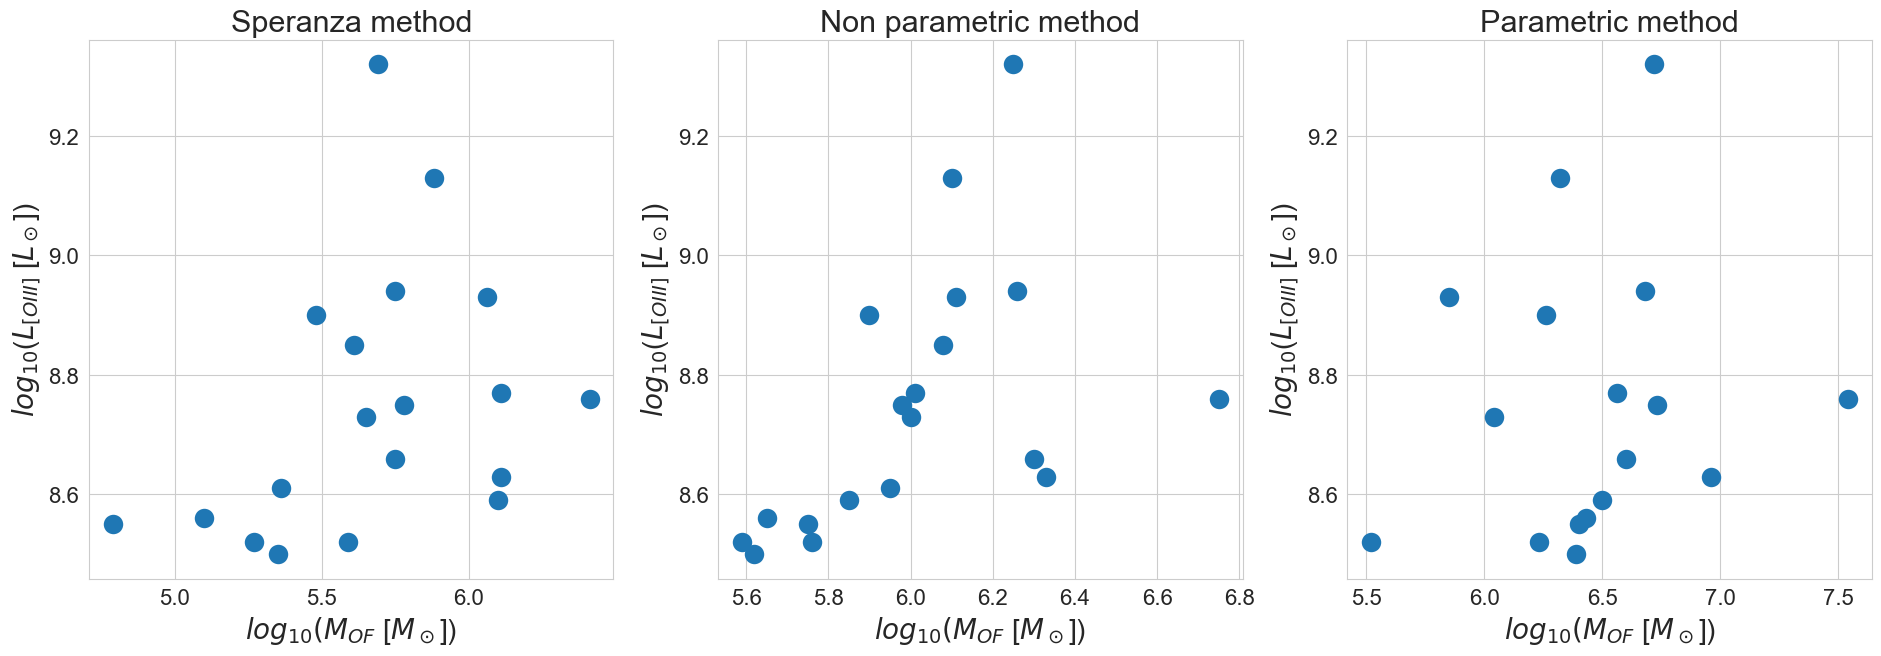

In [25]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(23,7))
ax1.scatter(speranza['LogMof'],targets_info['logLumO3'],linewidths=8)
ax1.set_xlabel(r'$log_{10} (M_{OF}$ [$M_\odot$])',fontsize=20)
ax1.set_ylabel(r'$log_{10}$($L_{[OIII]}$ [$L_\odot$])',fontsize=20)
ax1.set_title('Speranza method',fontsize=22)
ax1.tick_params(axis='both',labelsize=16)

ax2.scatter(nonparametric['LogMof'],targets_info['logLumO3'],linewidths=8)
ax2.set_xlabel(r'$log_{10} (M_{OF}$ [$M_\odot$])',fontsize=20)
ax2.set_ylabel(r'$log_{10}$($L_{[OIII]}$ [$L_\odot$])',fontsize=20)
ax2.set_title('Non parametric method',fontsize=22)
ax2.tick_params(axis='both',labelsize=16)


ax3.scatter(par['LogMof'],aux['logLumO3'],linewidths=8)
ax3.set_xlabel(r'$log_{10} (M_{OF}$ [$M_\odot$])',fontsize=20)
ax3.set_ylabel(r'$log_{10}$($L_{[OIII]}$ [$L_\odot$])',fontsize=20)
ax3.set_title('Parametric method',fontsize=22)
ax3.tick_params(axis='both',labelsize=16)


plt.savefig('outflowmass_lumO3.pdf',bbox_inches='tight')

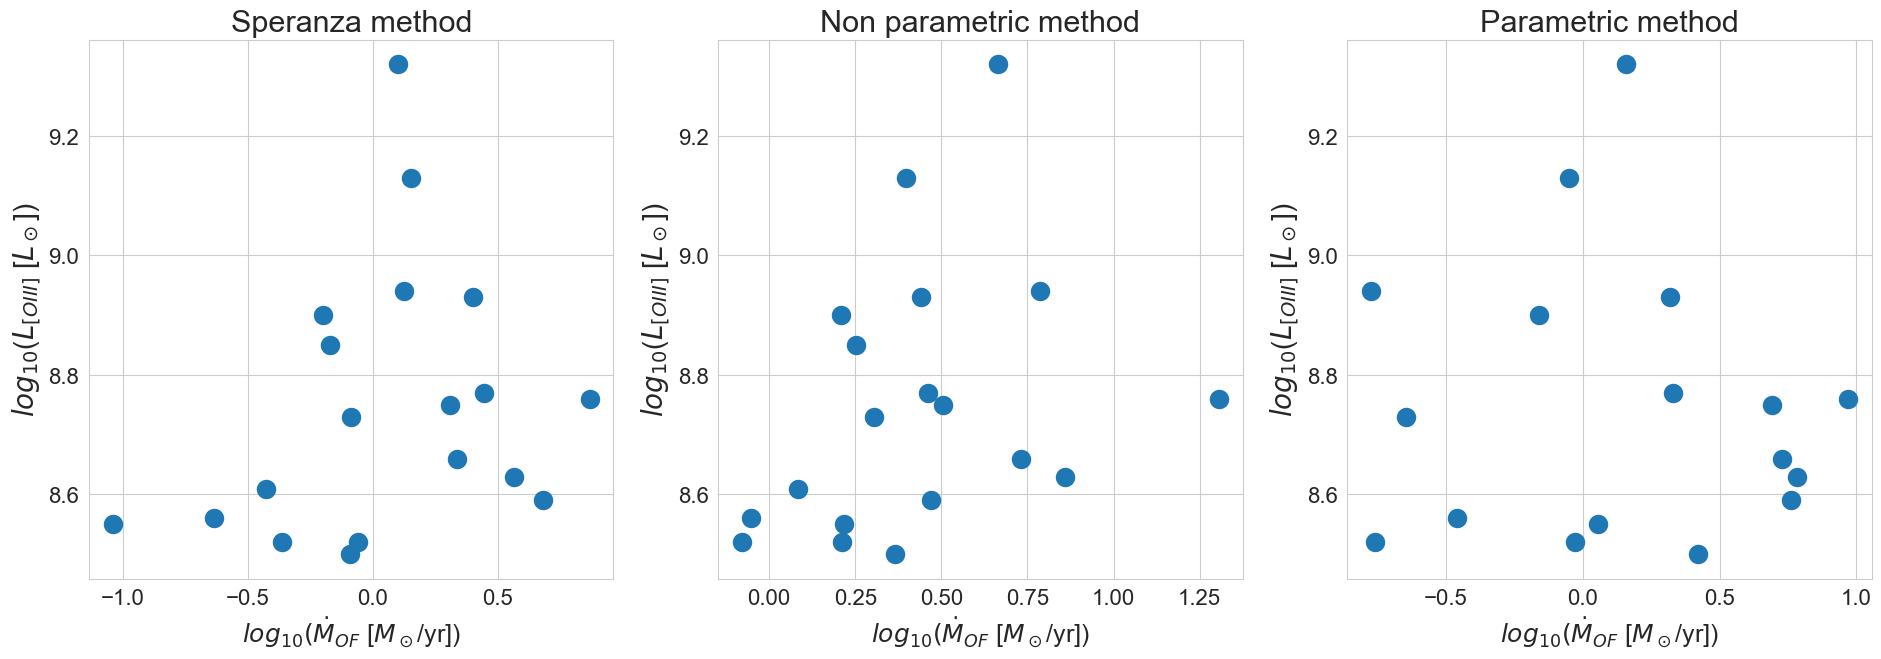

In [26]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(23,7))
ax1.scatter(np.log10(speranza['M.of']),targets_info['logLumO3'],linewidths=8)
ax1.set_xlabel(r'$log_{10}(\dot{M}_{OF}$ [$M_\odot$/yr])',fontsize=18)
ax1.set_ylabel(r'$log_{10}$($L_{[OIII]}$ [$L_\odot$])',fontsize=20)
ax1.set_title('Speranza method',fontsize=22)
ax1.tick_params(axis='both',labelsize=16)

ax2.scatter(np.log10(nonparametric['M.of']),targets_info['logLumO3'],linewidths=8)
ax2.set_xlabel(r'$log_{10}(\dot{M}_{OF}$ [$M_\odot$/yr])',fontsize=18)
ax2.set_ylabel(r'$log_{10}$($L_{[OIII]}$ [$L_\odot$])',fontsize=20)
ax2.set_title('Non parametric method',fontsize=22)
ax2.tick_params(axis='both',labelsize=16)

ax3.scatter(np.log10(par['M.of']),aux['logLumO3'],linewidths=8)
ax3.set_xlabel(r'$log_{10}(\dot{M}_{OF}$ [$M_\odot$/yr])',fontsize=18)
ax3.set_ylabel(r'$log_{10}$($L_{[OIII]}$ [$L_\odot$])',fontsize=20)
ax3.set_title('Parametric method',fontsize=22)
ax3.tick_params(axis='both',labelsize=16)

plt.savefig('outflowmassrate_loglumO3.pdf',bbox_inches='tight')

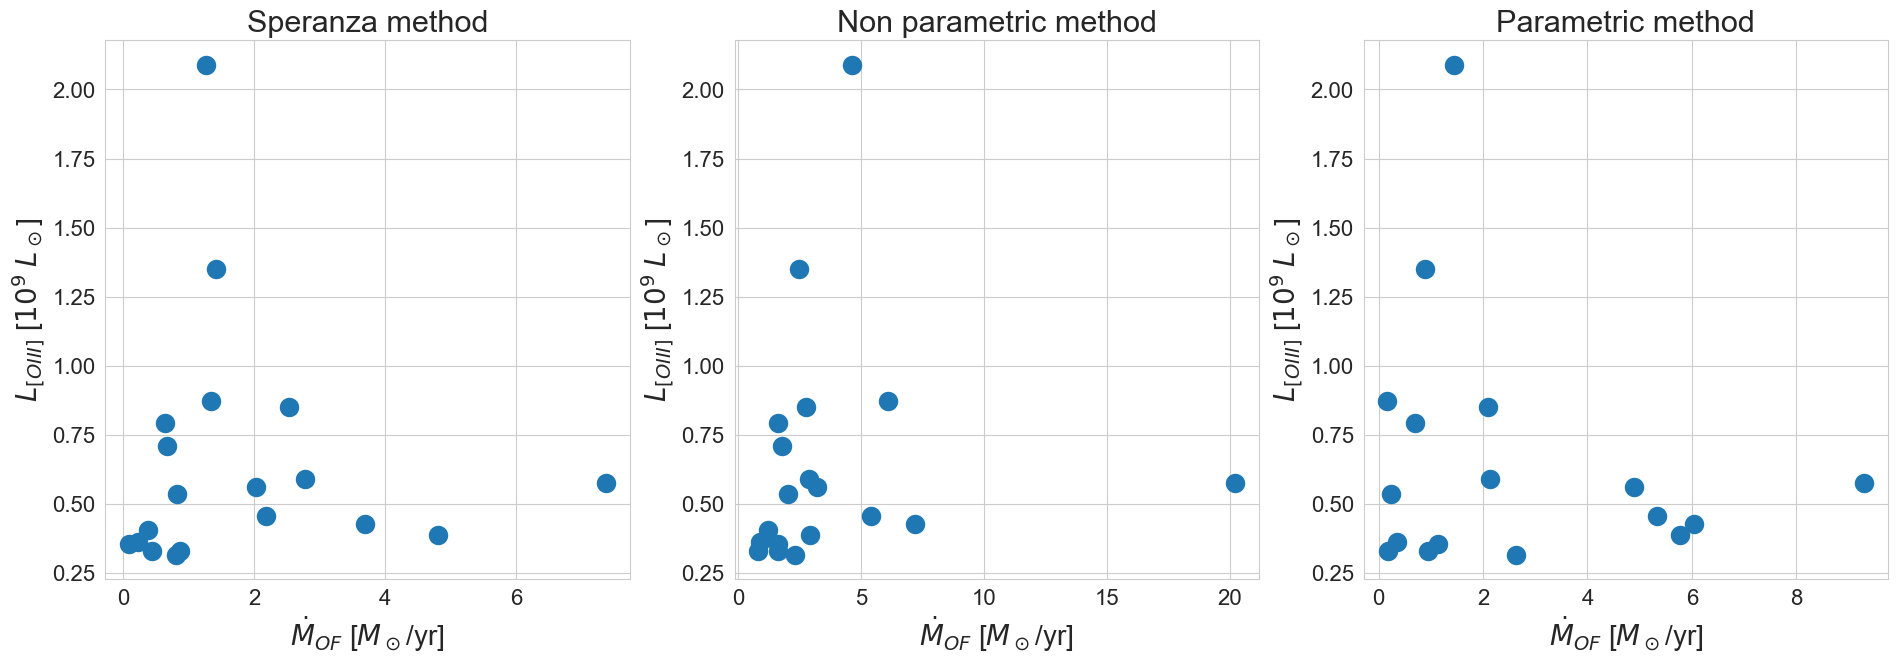

In [27]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(23,7))
ax1.scatter(df_spe[r'$\dot{M}_{OF}$'],df_spe[r'L$_{[OIII]}$/L$_{\odot}$']/1e9,linewidths=8)
ax1.set_xlabel(r'$\dot{M}_{OF}$ [$M_\odot$/yr]',fontsize=20)
ax1.set_ylabel(r'$L_{[OIII]}$ [$10^9$ $L_\odot$]',fontsize=20)
ax1.set_title('Speranza method',fontsize=22)
ax1.tick_params(axis='both',labelsize=16)

ax2.scatter(df_np[r'$\dot{M}_{OF}$'],df_np[r'L$_{[OIII]}$/L$_{\odot}$']/1e9,linewidths=8)
ax2.set_xlabel(r'$\dot{M}_{OF}$ [$M_\odot$/yr]',fontsize=20)
ax2.set_ylabel(r'$L_{[OIII]}$ [$10^9$ $L_\odot$]',fontsize=20)
ax2.set_title('Non parametric method',fontsize=22)
ax2.tick_params(axis='both',labelsize=16)

ax3.scatter(df_par[r'$\dot{M}_{OF}$'],df_par[r'L$_{[OIII]}$/L$_{\odot}$']/1e9,linewidths=8)
ax3.set_xlabel(r'$\dot{M}_{OF}$ [$M_\odot$/yr]',fontsize=20)
ax3.set_ylabel(r'$L_{[OIII]}$ [$10^9$ $L_\odot$]',fontsize=20)
ax3.set_title('Parametric method',fontsize=22)
ax3.tick_params(axis='both',labelsize=16)

plt.savefig('outflowmassrate_lumO3.pdf',bbox_inches='tight')